# Titanic Project

## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Getting the data

In [2]:
# Improve this next time
# Create a directory for datasets

def get_data(data_link):
    data = pd.read_csv(data_link)
    return data

train_data = get_data('https://raw.githubusercontent.com/wyx-smrf/Windows-Misc/main/Titanic%20Project/train.csv')
test_data = get_data('https://raw.githubusercontent.com/wyx-smrf/Windows-Misc/main/Titanic%20Project/test.csv')

In [3]:
df_train = get_data('https://raw.githubusercontent.com/wyx-smrf/Windows-Misc/main/Titanic%20Project/train.csv')
df_test = get_data('https://raw.githubusercontent.com/wyx-smrf/Windows-Misc/main/Titanic%20Project/test.csv')

## Quick look

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Companions = SibSp + Parch
# Price per head = Companions / Fare

In [6]:
train_data.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Distribution of values 

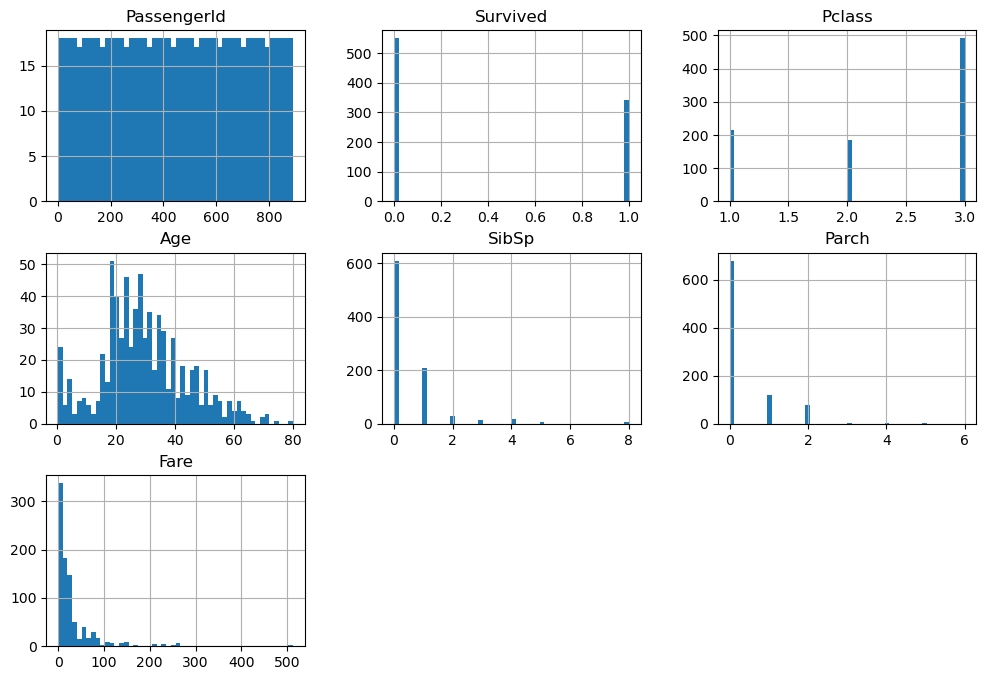

In [10]:
train_data.hist(bins=50, figsize=(12, 8))
plt.show()

## Missing Values

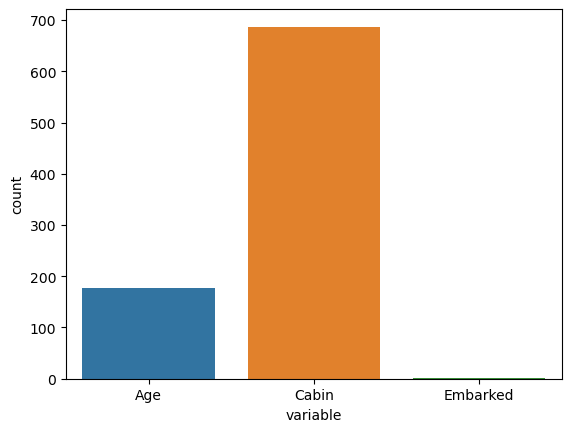

In [11]:
# Plot the null values of each column (count plot graph)

def null_plot(dataframe):
    
    # Determine the columns that have null values
    def listed_null_cols():
        null_columns = dataframe.columns[dataframe.isna().any()]
        return null_columns.tolist()
    
    # Retrieve the null values in the dataframe
    null_columns = dataframe[listed_null_cols()]
    null_rows = null_columns.loc[null_columns.isna().any(axis=1)]
    
    # Unpivot the dataframe cosisting of null values
    melted_dataframe = pd.melt(null_rows)
    melted_nulls = melted_dataframe[melted_dataframe['value'].isnull()]
    
    # Plot the null values
    sns.countplot(data=melted_nulls, x=melted_nulls['variable'])
    
    return plt.show()

null_plot(train_data)

----

In [17]:
new_data = get_data('https://raw.githubusercontent.com/wyx-smrf/Windows-Misc/main/Titanic%20Project/train.csv')

In [13]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:

params = {'dataframe': new_data, 
          'listed_delete_cols': ['PassengerId', 'Name', 'Ticket', 'Cabin']}

def delete_cols(dataframe, listed_delete_cols):
    new_dataframe = dataframe.drop(columns = listed_delete_cols, axis=1)
    return new_dataframe

In [15]:
new_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [18]:
dataprocess2 = delete_cols(**params)

In [19]:
dataprocess2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
def column_addition(X):
    return X[:, [0]] + X[:, [1]]

def column_division(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),

In [ ]:
# Companions = SibSp + Parch
# Price per head = Companions / Fare

In [29]:
x = df_train[["SibSp", "Parch"]]

In [45]:
x

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


In [48]:
def col_addition(dataframe):
    return dataframe[:, [0]] + dataframe[:, [1]]

In [ ]:
def column_addition(X):
    return X[:, [0]] + X[:, [1]]

# Creating Pipelines

In [ ]:
pd.DataFrame(train_data.groupby(['Sex','Pclass'])['Age'].mean())

In [ ]:
no_null

In [ ]:
df_nonull = df_train.dropna()

In [ ]:
sns.countplot(data=melted_nulls, x=melted_nulls['variable'])

## Exploring the Data

### Evaluation of Datatypes

In [ ]:
df_train.columns

In [ ]:
df_train.info()

In [ ]:
df_train.dtypes.value_counts()

In [ ]:
dtypes_list = list(df_train.dtypes.unique())

for data_type in dtypes_list:
    cols = df_train.select_dtypes(include=[data_type]).columns
    print(f'{data_type}: {list(cols)}')

### Evaluation of missing values

In [ ]:
df_train.isnull().sum()

In [ ]:
df_test.isnull().sum()

### View Distribution

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

distrib_plot = df_train.hist(bins=50, figsize=(12, 8))
plt.show()

### Visualizing the Data

In [ ]:
# View the unique column elements that can be used to countplot

# Using for loops
for columns in df_train.columns:
    if len(df_train[columns].unique()) <= 10:
        print(columns)
        
# Using list comprehension
cat_cols_list = [columns for columns in df_train.columns if len(df_train[columns].unique()) <= 10]

In [ ]:
for number, col in enumerate(df_train.columns):
    print(f'{number}, {col}')

In [ ]:
plot_params = {'data':               df_train,
               'row':               'Pclass',
               'column':            'Sex',
               'hist_basis':        'Age',
               'color':             'red'}

def cat_countplot(data, row, column, hist_basis, color):
    hist_plot = sns.FacetGrid(data, 
                              margin_titles=True,
                              col=column, row=row)
    hist_plot.map(plt.hist, hist_basis, color=color)
    return plt.show()
    
cat_countplot(**plot_params)

### Study the correlations

In [ ]:
sorted_correlation_params = {'data': df_train, 
                             'target': 'Survived', 
                             'correl_method': 'pearson'}

def sorted_correlation(data, target, correl_method):
                             
    # Convert categorical values to numeric
    le = LabelEncoder()
    data[target] = le.fit_transform(data[target])
  
    # Create correlation matrix
    corr_mat = data.corr(method=correl_method)
  
    # Retain upper triangular values of correlation matrix and
    # make Lower triangular values Null
    upper_corr_mat = corr_mat.where(
        np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
  
    # Convert to 1-D series and drop Null values
    unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
    # Sort correlation pairs
    sorted_mat = unique_corr_pairs.sort_values()

    return sorted_mat

sorted_correlation(**sorted_correlation_params)

It appears that there is not much significant correlation in the dataset

### Applying Data Transformations

In [ ]:
df_train_mod = df_train.copy()

In [ ]:
df_train_mod['companions'] = df_train_mod['SibSp'] + df_train_mod['Parch']
df_train_mod['price per head'] = df_train_mod['Fare'] / df_train_mod['companions']

In [ ]:
df_train_mod.head()

In [ ]:
df_train_mod['companions'].value_counts()

In [ ]:
df_train_mod['Fare'].sort_values(ascending=False)

In [ ]:
df_train[df_train['Age'].isna()]

## Preparing the Data

### Data Cleaning

1. Check Boxplot (Age per Pclass and by gender)
2. Determine the mean for each pclass

In [ ]:
df_nonull = df_train.dropna()

In [ ]:
df_nonull

In [ ]:
sns.catplot(
    data=df_nonull,       # DataFrame
    x='Sex',      # X-axis
    y='Age',       # y-axis
    col='Pclass',  # column
    kind='box',      # boxplot
    col_wrap=3
)

In [ ]:
g = sns.FacetGrid(df_nonull, col="Pclass",  row="Sex")
g.map_dataframe(sns.histplot, x="Age")

In [ ]:
pd.DataFrame(df_nonull.groupby(['Sex', 'Pclass'])['Age'].mean())

In [ ]:
pd.DataFrame(df_nonull.groupby(['Sex', 'Pclass'])['Age'].median())

In [ ]:
pd.DataFrame(df_nonull.groupby(['Sex', 'Pclass'])['Age'].median())

We have determined the average and median age by sex and passenger class, based on these values, based on the analysis, it is much better to use the mean, becuase the distribution is something that is not uniform.


We will use these values to impute the NaN in the Age column in the dataset

### Fill missing values based on a condition

https://stackoverflow.com/questions/62314390/sklearn-impute-rows-satisfying-condition

In [ ]:
df_imputed = df_train.copy()

In [ ]:
df_imputed['Age'] = df_imputed['Age'].fillna(df_imputed.groupby(['Pclass', 'Sex'])['Age'].transform('mean'))

In [ ]:
df_imputed['Age'].head(20)

In [ ]:
g = sns.FacetGrid(df_imputed, col="Pclass",  row="Sex")
g.map_dataframe(sns.histplot, x="Age")

In [ ]:
df_impute_target = df_imputed['Survived']
df_impute_target

### Convert text into numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df_imputed["Sex"] = le.fit_transform(df_imputed["Sex"])
df_imputed["Embarked"] = le.fit_transform(df_imputed["Embarked"])

### Drop useless features

In [ ]:
df_imputed = df_imputed.drop(['Ticket','Cabin','Survived'], axis=1)

In [ ]:
X = df_imputed
X

In [ ]:
x_test = df_test_dropped

In [ ]:
x_test['Age'] = x_test['Age'].fillna(x_test.groupby(['Pclass', 'Sex'])['Age'].transform('mean'))
x_test['Age'] = x_test['Age'].astype(int)
x_test['Fare'] = x_test['Fare'].fillna(0)

In [ ]:
x_test.isnull().sum()

In [ ]:
y = df_train['Survived']
y

## Shortlist Promising Models

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=150)
lr.fit(X, y)

In [ ]:
lr_pred = lr.predict(x_test)